 As discussed previously, text preprocessing and normalization is crucial before building a proper NLP model. Some of the important steps are:

1.Converting words to lower/upper case

2.Removing special characters

3.Removing stopwords and high/low-frequency words

4.Stemming/lemmatization

In [15]:
!pip install nltk

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Besh
[nltk_data]     Vignesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from multiprocessing import Pool
%matplotlib inline

#import text_processor as tp

In [6]:
#NLTK Packages
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

In [7]:
from pylab import rcParams
import warnings
rcParams['figure.figsize']=14,6
plt.style.use('ggplot')

In [8]:
with open('picklefile/perpare_data_set.pickle', 'rb') as data:
    data_set = pickle.load(data)

In [9]:
print(data_set.head())
print(data_set.count())

                                             content  rating  sentiment
0  This kindle is light and easy to use especiall...     5.0        1.0
1  Didnt know how much i'd use a kindle so went f...     4.0        1.0
2  I am 100 happy with my purchase. I caught it o...     5.0        1.0
3  Solid entry level Kindle. Great for kids. Gift...     5.0        1.0
4  This make an excellent ebook reader. Don't exp...     5.0        1.0
content      10628
rating       10628
sentiment    10628
dtype: int64


In [10]:
data_set.head()

,content,rating,sentiment
0,This kindle is light and easy to use especiall...,5.0,1.0
1,Didnt know how much i'd use a kindle so went f...,4.0,1.0
2,I am 100 happy with my purchase. I caught it o...,5.0,1.0
3,Solid entry level Kindle. Great for kids. Gift...,5.0,1.0
4,This make an excellent ebook reader. Don't exp...,5.0,1.0


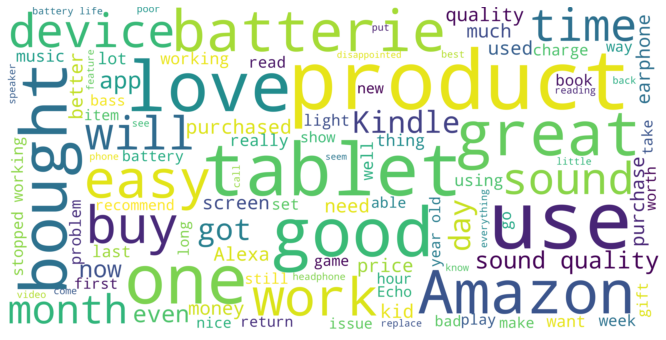

In [12]:
word_cloud_text = ''.join(data_set['content'])
wordcloud = WordCloud(max_font_size=100,max_words=100,background_color='white',
                         scale=10,width=800,height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
data_set['content_new'] = data_set['content'].str.lower()

In [21]:
from nltk import word_tokenize
word_tokenize("Hi! what are you doing? Looks interesting to me.")

['Hi',
 '!',
 'what',
 'are',
 'you',
 'doing',
 '?',
 'Looks',
 'interesting',
 'to',
 'me',
 '.']

In [29]:

token_lists = [word_tokenize(each) for each in data_set['content']]
tokens = [item for sublist in token_lists for item in sublist]
print('No. of unique tokens then : ',len(set(tokens)))

token_lists_lower = [word_tokenize(each) for each in data_set['content_new']]
tokens = [item for sublist in token_lists_lower for item in sublist]
print('No. of unique tokens now  : ',len(set(tokens)))

No. of unique tokens then :  14600
No. of unique tokens now  :  12213


In [30]:
#Remove special characters
spl_chars = data_set['content_new'].apply(lambda review:
                                          [char for char in list(review) if not char.isalnum() and char !=' '])
flat_list = [item for sublist in spl_chars for item in sublist]
set(flat_list)

{'\n',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '_',
 '`',
 '~',
 '\xa0',
 '§',
 '©',
 '¶',
 '\u200b',
 '\u200d',
 '–',
 '‘',
 '’',
 '‚',
 '“',
 '”',
 '•',
 '₹',
 '∏',
 '√',
 '≠',
 '☹',
 '♂',
 '⚠',
 '⭐',
 '️',
 '🌗',
 '🎧',
 '🏻',
 '👂',
 '👈',
 '👉',
 '👍',
 '👎',
 '👏',
 '👿',
 '💯',
 '💰',
 '📦',
 '🔊',
 '🔋',
 '😀',
 '😂',
 '😑',
 '😒',
 '😔',
 '😕',
 '😖',
 '😞',
 '😠',
 '😡',
 '😣',
 '😤',
 '😬',
 '😭',
 '😶',
 '🙁',
 '🙏',
 '🤗',
 '🤣',
 '🤦'}

In [31]:
content_backup = data_set['content_new'].copy()
data_set['content_new'] = data_set['content_new'].str.replace(r'[^A-Za-z0-9 ]+',' ')

In [32]:
data_set.head()

,content,rating,sentiment,content_new
0,This kindle is light and easy to use especiall...,5.0,1.0,this kindle is light and easy to use especiall...
1,Didnt know how much i'd use a kindle so went f...,4.0,1.0,didnt know how much i d use a kindle so went f...
2,I am 100 happy with my purchase. I caught it o...,5.0,1.0,i am 100 happy with my purchase i caught it o...
3,Solid entry level Kindle. Great for kids. Gift...,5.0,1.0,solid entry level kindle great for kids gift...
4,This make an excellent ebook reader. Don't exp...,5.0,1.0,this make an excellent ebook reader don t exp...


In [33]:

token_lists = [word_tokenize(each) for each in data_set['content']]
tokens = [item for sublist in token_lists for item in sublist]
print('No. of unique tokens then : ',len(set(tokens)))

token_lists_lower = [word_tokenize(each) for each in data_set['content_new']]
tokens = [item for sublist in token_lists_lower for item in sublist]
print('No. of unique tokens now  : ',len(set(tokens)))

No. of unique tokens then :  14600
No. of unique tokens now  :  9598


In [38]:
from nltk.corpus import stopwords

noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = data_set['content_new'][3]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)
        
print(' Original Sentence \n',sentence)
print('\n Stopwords in the sentence \n', stopword)
print(' \n Non Stopwords in the sentence \n',without_stop_words)

 Original Sentence 
 solid entry level kindle  great for kids  gifted for a kid of my friend and they love to use it to read more than their ipads  battery is good but higher model is a bit better 

 Stopwords in the sentence 
 ['for', 'for', 'a', 'of', 'my', 'and', 'they', 'to', 'it', 'to', 'more', 'than', 'their', 'is', 'but', 'is', 'a']
 
 Non Stopwords in the sentence 
 ['solid', 'entry', 'level', 'kindle', 'great', 'kids', 'gifted', 'kid', 'friend', 'love', 'use', 'read', 'ipads', 'battery', 'good', 'higher', 'model', 'bit', 'better']


In [58]:
def stopwords_removal(stop_words,sentence):
    return[word for word in nltk.word_tokenize(sentence) if word not in stop_words]

data_set['content_nostop'] = data_set['content_new'].apply(lambda row: stopwords_removal(stop_words, row))
data_set.head()

,content,rating,sentiment,content_new,content_nostop
0,This kindle is light and easy to use especiall...,5.0,1.0,this kindle is light and easy to use especiall...,"[kindle, light, easy, use, especially, beach]"
1,Didnt know how much i'd use a kindle so went f...,4.0,1.0,didnt know how much i d use a kindle so went f...,"[didnt, know, much, use, kindle, went, lower, ..."
2,I am 100 happy with my purchase. I caught it o...,5.0,1.0,i am 100 happy with my purchase i caught it o...,"[100, happy, purchase, caught, sale, really, g..."
3,Solid entry level Kindle. Great for kids. Gift...,5.0,1.0,solid entry level kindle great for kids gift...,"[solid, entry, level, kindle, great, kids, gif..."
4,This make an excellent ebook reader. Don't exp...,5.0,1.0,this make an excellent ebook reader don t exp...,"[make, excellent, ebook, reader, expect, much,..."


In [59]:
#Stemming And Lemmatization
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Besh
[nltk_data]     Vignesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [60]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Provide a word to be lemmatized
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


In [69]:
#Building ML Model
data_set_new = data_set[['content_new','content_nostop','rating','sentiment']]

In [70]:
data_set_new.head()

,content_new,content_nostop,rating,sentiment
0,this kindle is light and easy to use especiall...,"[kindle, light, easy, use, especially, beach]",5.0,1.0
1,didnt know how much i d use a kindle so went f...,"[didnt, know, much, use, kindle, went, lower, ...",4.0,1.0
2,i am 100 happy with my purchase i caught it o...,"[100, happy, purchase, caught, sale, really, g...",5.0,1.0
3,solid entry level kindle great for kids gift...,"[solid, entry, level, kindle, great, kids, gif...",5.0,1.0
4,this make an excellent ebook reader don t exp...,"[make, excellent, ebook, reader, expect, much,...",5.0,1.0


In [71]:
# save the dataset
with open('picklefile/data_preprocessing.pickle', 'wb') as data:
    pickle.dump(data_set_new, data)